In [55]:
import csv
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [10]:
## Reads a 3d array into np.array 
def read_3d(filename):
    with open(filename+'.csv', 'r') as f:
        reader = csv.reader(f)
        examples = list(reader)

    output = []
    for row in examples:
        nwrow = []
        for r in row:
            nwrow.append(eval(r))
        output.append(nwrow)

    N, num_lags, num_links = len(output), len(output[0]), len(output[0][0])
    X = np.zeros((N, num_lags, num_links))
    for n in range(N):
        for lag in range(num_lags):
            for lnk in range(num_links):
                X[n, lag, lnk] = output[n][lag][lnk]
    return X

In [26]:
mse_l10  = read_3d("BNN Lag 10/mse_final2")
icp_l10  = read_3d("BNN Lag 10/icp_final2")
mil_l10  = read_3d("BNN Lag 10/mil_final2")
time_l10 = read_3d("BNN Lag 10/time_final2")
tradeoff_l10 = np.abs(icp_l10 - 0.90)*mil_l10

mse_l20  = read_3d("BNN Lag 20/mse_final2")
icp_l20  = read_3d("BNN Lag 20/icp_final2")
mil_l20  = read_3d("BNN Lag 20/mil_final2")
time_l20 = read_3d("BNN Lag 20/time_final2")
tradeoff_l20 = np.abs(icp_l20 - 0.90)*mil_l20

In [39]:
units = np.arange(6, 72, 12)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


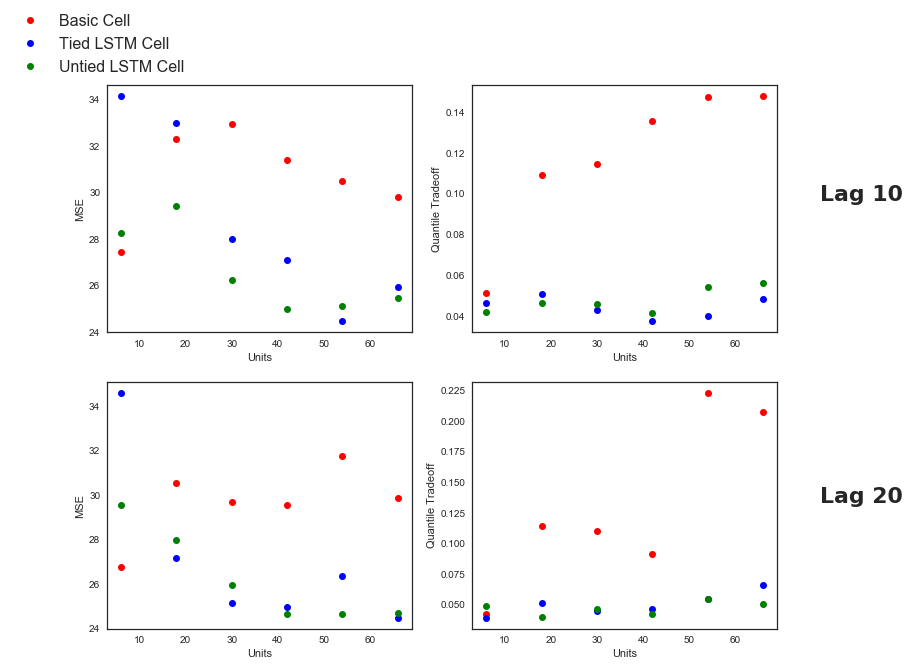

In [56]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={'width_ratios':[1.7,1.7]})
l1, = ax1.plot(units,np.mean(mse_l10[1:,:,0], axis=0), 'ro')
l2, = ax1.plot(units,np.mean(mse_l10[1:,:,1], axis=0), 'bo')
l3, = ax1.plot(units,np.mean(mse_l10[1:,:,2], axis=0), 'go')
ax1.set_ylabel('MSE')
ax1.set_xlabel('Units')

ax2.plot(units,np.mean(tradeoff_l10[:,:,0], axis=0), 'ro')
ax2.plot(units,np.mean(tradeoff_l10[:,:,1], axis=0), 'bo')
ax2.plot(units,np.mean(tradeoff_l10[:,:,2], axis=0), 'go')
ax2.set_ylabel('Quantile Tradeoff')
ax2.set_xlabel('Units')

ax3.plot(units,np.mean(mse_l20[1:,:,0], axis=0), 'ro')
ax3.plot(units,np.mean(mse_l20[1:,:,1], axis=0), 'bo')
ax3.plot(units,np.mean(mse_l20[1:,:,2], axis=0), 'go')
ax3.set_ylabel('MSE')
ax3.set_xlabel('Units')

ax4.plot(units,np.mean(tradeoff_l20[:,:,0], axis=0), 'ro')
ax4.plot(units,np.mean(tradeoff_l20[:,:,1], axis=0), 'bo')
ax4.plot(units,np.mean(tradeoff_l20[:,:,2], axis=0), 'go')
ax4.set_ylabel('Quantile Tradeoff')
ax4.set_xlabel('Units')

f.text(0.95, 0.72, "Lag 10", fontdict = {'family' : 'normal','weight' : 'bold','size'   : 22})
f.text(0.95, 0.30, "Lag 20", fontdict = {'family' : 'normal','weight' : 'bold','size'   : 22})
f.legend((l1, l2, l3), ('Basic Cell', 'Tied LSTM Cell', 'Untied LSTM Cell'), 'upper left',prop={'size': 16})

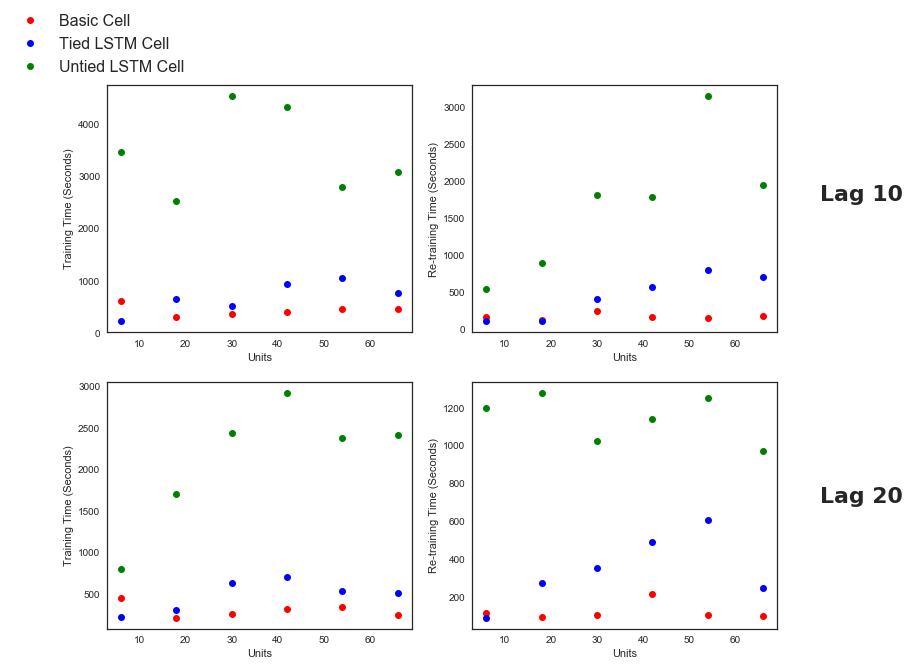

In [57]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={'width_ratios':[1.7,1.7]})
l1, = ax1.plot(units,time_l10[0,:,0], 'ro')
l2, = ax1.plot(units,time_l10[0,:,1], 'bo')
l3, = ax1.plot(units,time_l10[0,:,2], 'go')
ax1.set_ylabel('Training Time (Seconds)')
ax1.set_xlabel('Units')

ax2.plot(units,np.mean(time_l10[1:,:,0], axis=0), 'ro')
ax2.plot(units,np.mean(time_l10[1:,:,1], axis=0), 'bo')
ax2.plot(units,np.mean(time_l10[1:,:,2], axis=0), 'go')
ax2.set_ylabel('Re-training Time (Seconds)')
ax2.set_xlabel('Units')

ax3.plot(units,time_l20[0,:,0], 'ro')
ax3.plot(units,time_l20[0,:,1], 'bo')
ax3.plot(units,time_l20[0,:,2], 'go')
ax3.set_ylabel('Training Time (Seconds)')
ax3.set_xlabel('Units')

ax4.plot(units,np.mean(time_l20[1:,:,0], axis=0), 'ro')
ax4.plot(units,np.mean(time_l20[1:,:,1], axis=0), 'bo')
ax4.plot(units,np.mean(time_l20[1:,:,2], axis=0), 'go')
ax4.set_ylabel('Re-training Time (Seconds)')
ax4.set_xlabel('Units')

f.text(0.95, 0.72, "Lag 10", fontdict = {'family' : 'normal','weight' : 'bold','size'   : 22})
f.text(0.95, 0.30, "Lag 20", fontdict = {'family' : 'normal','weight' : 'bold','size'   : 22})
f.legend((l1, l2, l3), ('Basic Cell', 'Tied LSTM Cell', 'Untied LSTM Cell'), 'upper left',prop={'size': 16})

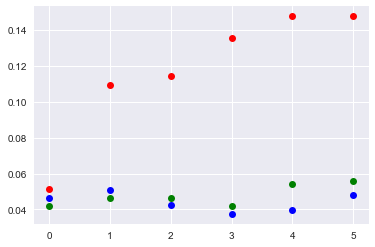

In [27]:
plt.plot(np.mean(tradeoff_l10[:,:,0], axis=0), 'ro')
plt.plot(np.mean(tradeoff_l10[:,:,1], axis=0), 'bo')
plt.plot(np.mean(tradeoff_l10[:,:,2], axis=0), 'go')

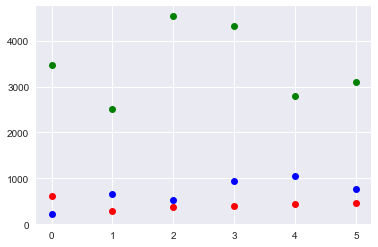

In [32]:
plt.plot(time_l10[0,:,0], 'ro')
plt.plot(time_l10[0,:,1], 'bo')
plt.plot(time_l10[0,:,2], 'go')

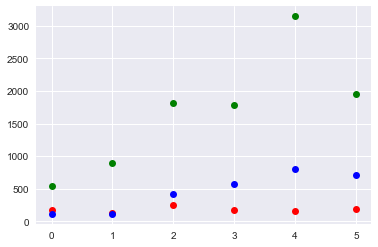

In [29]:
plt.plot(np.mean(time_l10[1:,:,0], axis=0), 'ro')
plt.plot(np.mean(time_l10[1:,:,1], axis=0), 'bo')
plt.plot(np.mean(time_l10[1:,:,2], axis=0), 'go')